In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("titanicdataset.csv")

In [132]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [8]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices,test_indices in split.split(df,df[['Survived','Pclass','Sex']]):
    strat_train_set=df.loc[train_indices]
    strat_test_set=df.loc[test_indices]

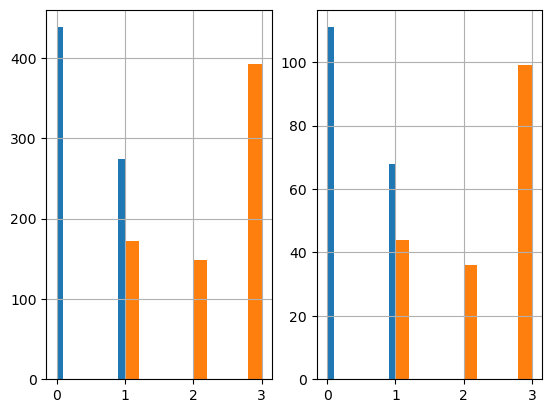

In [12]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [14]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 650 to 690
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          564 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [38]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [40]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
       encoder = OneHotEncoder()
       matrix = encoder.fit_transform(X[['Embarked']]).toarray()
       column_names = [" ", "S", "Q", "N"]
       for i in range(len(matrix.T)):
           X[column_names[i]]=matrix.T[i]
       matrix=encoder.fit_transform(X[['Sex']]).toarray()
       columnnames = ["Female", "Male"]
       for i in range(len(matrix.T)):
           X[columnnames[i]]= matrix.T[i]
       return X    

In [48]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex","N"], axis=1, errors="ignore")

In [50]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),("featureencoder", FeatureEncoder()),("featuredropper", FeatureDropper())])

In [52]:
strat_train_set=pipeline.fit_transform(strat_train_set)
strat_train_set

PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare       \
650          651         0       3  29.396862      0      0    7.8958  0.0   
70            71         0       2  32.000000      0      0   10.5000  0.0   
431          432         1       3  29.396862      1      0   16.1000  0.0   
831          832         1       2   0.830000      1      1   18.7500  0.0   
435          436         1       1  14.000000      1      2  120.0000  0.0   
..           ...       ...     ...        ...    ...    ...       ...  ...   
890          891         0       3  32.000000      0      0    7.7500  0.0   
286          287         1       3  30.000000      0      0    9.5000  0.0   
248          249         1       1  37.000000      1      1   52.5542  0.0   
219          220         0       2  30.000000      0      0   10.5000  0.0   
690          691         1       1  31.000000      1      0   57.0000  0.0   

       S    Q  Female  Male  
650  0.0  1.0     0.0   1.0  
70   0.0  1.0     0.0   1.0  
431  0.0  1.0     1.0   0.0  
831  0.0  1.0     0.0   1.0  
435  0.0  1.0     1.0   0.0  
..   ...  ...     ...   ...  
890  1.0  0.0     0.0   1.0  
286  0.0  1.0     0.0   1.0  
248  0.0  1.0     0.0   1.0  
219  0.0  1.0     0.0   1.0  
690  0.0  1.0     0.0   1.0  

[712 rows x 12 columns]

In [54]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 650 to 690
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7                712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [56]:
from sklearn.preprocessing import StandardScaler
X= strat_train_set.drop(['Survived'],axis=1)
Y= strat_train_set['Survived']
scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
param_gird=[{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
grid_search=GridSearchCV(clf,param_gird,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [82]:
prod_final_clf=grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("titanicdataset.csv")

In [98]:
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [100]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [102]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [104]:
pd.crosstab(df['Sex'],df['Survived'])

Survived    0    1
Sex               
female     81  233
male      468  109

In [ ]:
woman=df[df['Sex']=='female']
woman

In [106]:
woman=df[df['Sex']=='female']
woman

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
880      1            230433  26.0000   NaN        S  
882      0              7552  10.5167   NaN        S  
885      5            382652  29.1250   NaN        Q  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  

[314 rows x 12 columns]

In [108]:
man=df[df['Sex']=='male']
man

PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
889          890         1       1           Behr, Mr. Karl Howell  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1      0         A/5 21171   7.2500   NaN        S  
4    35.0      0      0            373450   8.0500   NaN        S  
5     NaN      0      0            330877   8.4583   NaN        Q  
6    54.0      0      0             17463  51.8625   E46        S  
7     2.0      3      1            349909  21.0750   NaN        S  
..    ...    ...    ...               ...      ...   ...      ...  
883  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
886  27.0      0      0            211536  13.0000   NaN        S  
889  26.0      0      0            111369  30.0000  C148        C  
890  32.0      0      0            370376   7.7500   NaN        Q  

[577 rows x 12 columns]

In [110]:
woman_sur=woman[woman['Survived']==1]
woman_sur

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
874          875         1       2   
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ...    ...   
874              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0      1   
875                   Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880       Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   

     Parch            Ticket     Fare Cabin Embarked  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
8        2            347742  11.1333   NaN        S  
9        0            237736  30.0708   NaN        C  
..     ...               ...      ...   ...      ...  
874      0         P/PP 3381  24.0000   NaN        C  
875      0              2667   7.2250   NaN        C  
879      1             11767  83.1583   C50        C  
880      1            230433  26.0000   NaN        S  
887      0            112053  30.0000   B42        S  

[233 rows x 12 columns]

In [112]:
woman_notsur=woman[woman['Survived']==0]
woman_notsur

PassengerId  Survived  Pclass  \
14            15         0       3   
18            19         0       3   
24            25         0       3   
38            39         0       3   
40            41         0       3   
..           ...       ...     ...   
854          855         0       2   
863          864         0       3   
882          883         0       3   
885          886         0       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
24                       Palsson, Miss. Torborg Danira  female   8.0      3   
38                  Vander Planke, Miss. Augusta Maria  female  18.0      2   
40      Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  female  40.0      1   
..                                                 ...     ...   ...    ...   
854      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
882                       Dahlberg, Miss. Gerda Ulrika  female  22.0      0   
885               Rice, Mrs. William (Margaret Norton)  female  39.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
14       0      350406   7.8542   NaN        S  
18       0      345763  18.0000   NaN        S  
24       1      349909  21.0750   NaN        S  
38       0      345764  18.0000   NaN        S  
40       0        7546   9.4750   NaN        S  
..     ...         ...      ...   ...      ...  
854      0      244252  26.0000   NaN        S  
863      2    CA. 2343  69.5500   NaN        S  
882      0        7552  10.5167   NaN        S  
885      5      382652  29.1250   NaN        Q  
888      2  W./C. 6607  23.4500   NaN        S  

[81 rows x 12 columns]

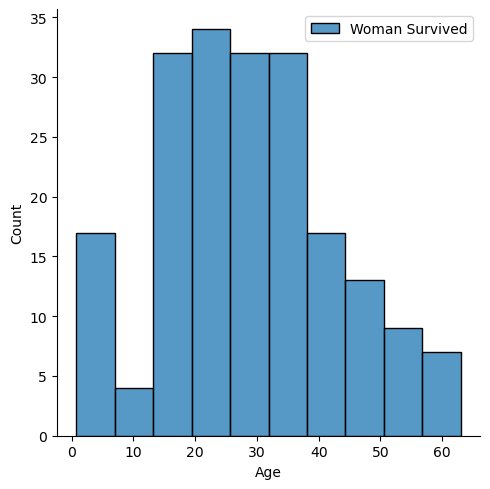

In [114]:
sns.displot(woman_sur.Age,label='Woman Survived',kde=False)
plt.legend()

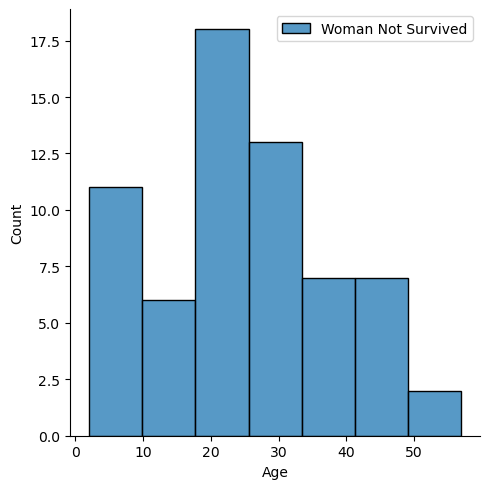

In [116]:
sns.displot(woman_notsur.Age,label='Woman Not Survived',kde=False)
plt.legend()

In [118]:
man_sur=man[man['Survived']==1]
man_sur

PassengerId  Survived  Pclass                             Name   Sex  \
17            18         1       2     Williams, Mr. Charles Eugene  male   
21            22         1       2            Beesley, Mr. Lawrence  male   
23            24         1       1     Sloper, Mr. William Thompson  male   
36            37         1       3                 Mamee, Mr. Hanna  male   
55            56         1       1                Woolner, Mr. Hugh  male   
..           ...       ...     ...                              ...   ...   
838          839         1       3                  Chip, Mr. Chang  male   
839          840         1       1             Marechal, Mr. Pierre  male   
857          858         1       1           Daly, Mr. Peter Denis   male   
869          870         1       3  Johnson, Master. Harold Theodor  male   
889          890         1       1            Behr, Mr. Karl Howell  male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
17    NaN      0      0  244373  13.0000   NaN        S  
21   34.0      0      0  248698  13.0000   D56        S  
23   28.0      0      0  113788  35.5000    A6        S  
36    NaN      0      0    2677   7.2292   NaN        C  
55    NaN      0      0   19947  35.5000   C52        S  
..    ...    ...    ...     ...      ...   ...      ...  
838  32.0      0      0    1601  56.4958   NaN        S  
839   NaN      0      0   11774  29.7000   C47        C  
857  51.0      0      0  113055  26.5500   E17        S  
869   4.0      1      1  347742  11.1333   NaN        S  
889  26.0      0      0  111369  30.0000  C148        C  

[109 rows x 12 columns]

In [120]:
man_notsur=man[man['Survived']==0]
man_notsur

PassengerId  Survived  Pclass                            Name   Sex  \
0              1         0       3         Braund, Mr. Owen Harris  male   
4              5         0       3        Allen, Mr. William Henry  male   
5              6         0       3                Moran, Mr. James  male   
6              7         0       1         McCarthy, Mr. Timothy J  male   
7              8         0       3  Palsson, Master. Gosta Leonard  male   
..           ...       ...     ...                             ...   ...   
881          882         0       3              Markun, Mr. Johann  male   
883          884         0       2   Banfield, Mr. Frederick James  male   
884          885         0       3          Sutehall, Mr. Henry Jr  male   
886          887         0       2           Montvila, Rev. Juozas  male   
890          891         0       3             Dooley, Mr. Patrick  male   

      Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    22.0      1      0         A/5 21171   7.2500   NaN        S  
4    35.0      0      0            373450   8.0500   NaN        S  
5     NaN      0      0            330877   8.4583   NaN        Q  
6    54.0      0      0             17463  51.8625   E46        S  
7     2.0      3      1            349909  21.0750   NaN        S  
..    ...    ...    ...               ...      ...   ...      ...  
881  33.0      0      0            349257   7.8958   NaN        S  
883  28.0      0      0  C.A./SOTON 34068  10.5000   NaN        S  
884  25.0      0      0   SOTON/OQ 392076   7.0500   NaN        S  
886  27.0      0      0            211536  13.0000   NaN        S  
890  32.0      0      0            370376   7.7500   NaN        Q  

[468 rows x 12 columns]

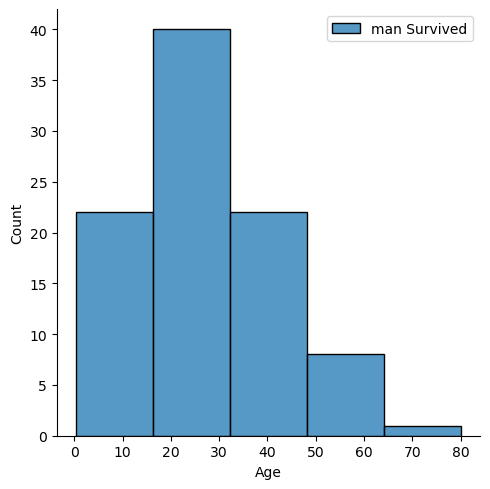

In [122]:
sns.displot(man_sur.Age,bins=5,label='man Survived',kde=False)
plt.legend()

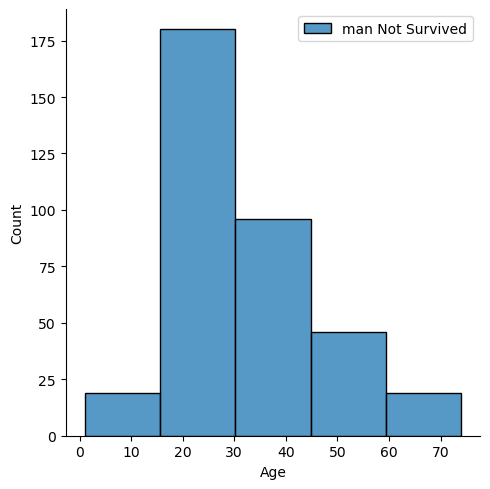

In [124]:

sns.displot(man_notsur.Age,bins=5,label='man Not Survived',kde=False)
plt.legend()

In [126]:
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [128]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

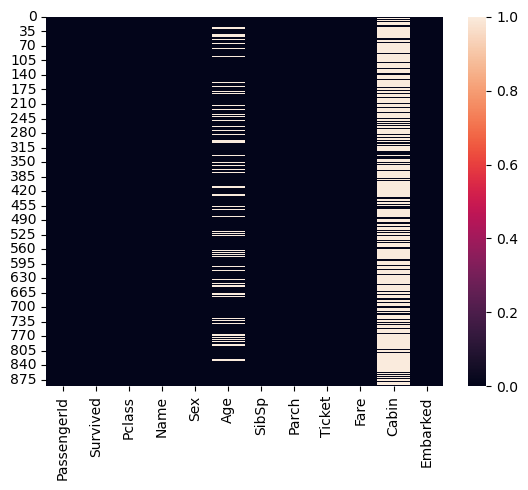

In [130]:
sns.heatmap(df.isnull())